# Average fragmentation

This code will generate a bar chart showing the fragmentation benchmark results.

## Parameters

In [4]:
input_csv = 'data/frag_waste_benchmarks.csv'

mem_size = 134217728
bl1_ratio = 50

title = "Fragmentation performance"
file = f'rendered/Fragmentation # memsize {mem_size} # b1 {bl1_ratio}.png'
save = False

## The code

### Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, PercentFormatter)

### Load & filter data

In [6]:
all_benchmarks = pd.read_csv(input_csv)

data = all_benchmarks[
    (all_benchmarks["Memory size"] == mem_size) &
    (all_benchmarks["Block 1 ratio"] == bl1_ratio)].sort_values("Frag Average (us)")
data

,Test,Memory size,Block 1 ratio,Frag Average (us),Frag Low 95th (us),Frag High 95th (us),Frag Std dev (us),Mem Waste Average (us),Mem Waste Low 95th (us),Mem Waste High 95th (us),Mem Waste Std dev (us)
84,Bitmap Allocator (First Fit),134217728,50,0.204662,0.247192,0.174623,0.022301,8.192000e+03,8192.0,8192.0,0.000000e+00
86,Bitmap Allocator (Best Fit),134217728,50,0.240117,0.279672,0.208370,0.022285,8.192000e+03,8192.0,8192.0,0.000000e+00
93,BST Allocator,134217728,50,0.240139,0.280577,0.210600,0.022387,1.399979e+05,151142.4,129024.0,6.677160e+03
94,BBST Allocator,134217728,50,0.240485,0.281965,0.208359,0.022545,4.696832e+04,50995.2,42803.2,2.372488e+03
95,DualBBST Allocator,134217728,50,0.240485,0.281965,0.208359,0.022545,4.705451e+04,51200.0,43008.0,2.370731e+03
89,Linked List Allocator (First Fit),134217728,50,0.240807,0.284421,0.208887,0.022651,1.223748e+05,132096.0,113049.6,5.687853e+03
88,Buddy Allocator,134217728,50,0.241765,0.339034,0.171219,0.050882,2.672746e+07,29075046.0,24414208.0,1.486780e+06
91,Linked List Allocator (Best Fit),134217728,50,0.242634,0.287639,0.212702,0.022429,1.530479e+05,165273.6,140492.8,7.493959e+03
87,Bitmap Allocator (Worst Fit),134217728,50,0.900641,0.945286,0.841841,0.031719,8.192000e+03,8192.0,8192.0,0.000000e+00
85,Bitmap Allocator (Next Fit),134217728,50,0.990579,0.997164,0.968709,0.009635,8.192000e+03,8192.0,8192.0,0.000000e+00


### Calculate error

In [9]:
error = [np.subtract(data['Frag Low 95th (us)'], data['Frag Average (us)']),
         np.subtract(data['Frag Average (us)'], data['Frag High 95th (us)'])]
error

[84    0.042530
 86    0.039555
 93    0.040438
 94    0.041481
 95    0.041481
 89    0.043614
 88    0.097269
 91    0.045005
 87    0.044645
 85    0.006585
 90    0.006031
 92    0.000201
 dtype: float64,
 84    0.030039
 86    0.031747
 93    0.029539
 94    0.032126
 95    0.032126
 89    0.031920
 88    0.070546
 91    0.029931
 87    0.058800
 85    0.021870
 90    0.020160
 92    0.000231
 dtype: float64]

### Plot

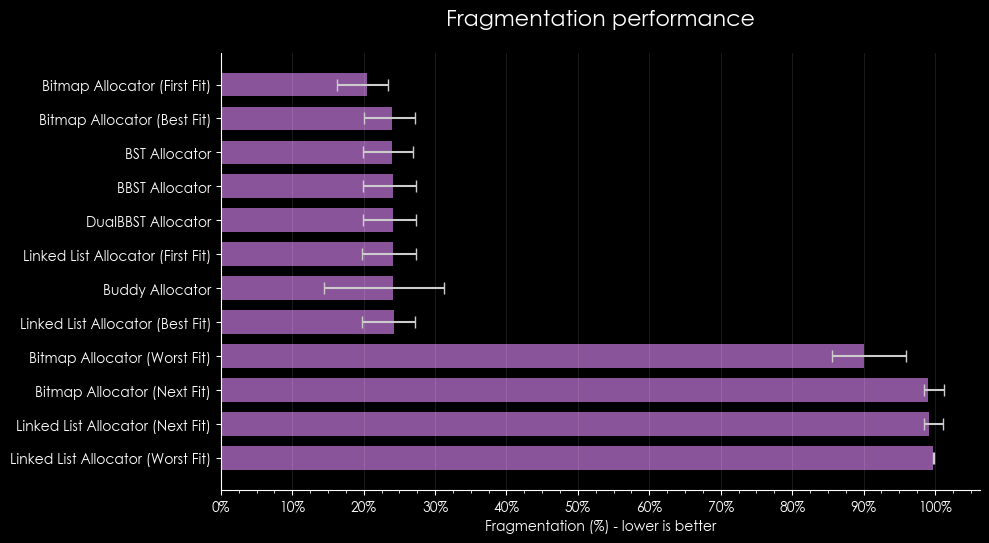

In [10]:
def addlabels(x, y, err):
    offset=0.5
    for i in range(len(x)):
        plt.text(offset+y.iloc[i]+err[1].iloc[i], i, ' {0:.2f}'.format(y.iloc[i]), va = 'center')

plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Century Gothic'
base_height = 1.04
row_height = 0.375
plt.figure(figsize=(10, base_height + row_height * len(data.index)))
plt.title(title, fontsize=16, pad=20)
plt.gca().invert_yaxis()
ax = plt.subplot()
ax.barh(data['Test'],
        data['Frag Average (us)'],
        color='#C678DD',
        xerr=error,
        ecolor='#ccc',
        alpha=0.7,
        capsize=4,
        height=.7)
ax.set_xlabel('Fragmentation (%) - lower is better')
#addlabels(data['Allocator'], data['Frag Average (us)'], error)
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.025))
ax.grid(True, axis='x', color='white', alpha=.1)
ax.spines[['right', 'top']].set_visible(False)
fig = plt.gcf()
fig.tight_layout()

if save:
    fig.savefig(file, transparent=True, dpi=300)

plt.show()